In [5]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 342.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import scipy.linalg
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

Матрица управляемости:
 [[0. 1.]
 [1. 0.]]
Ранг матрицы управляемости: 2 

P(0) для случая 17.1:
 [[2.179 0.25 ]
 [0.25  0.629]] 

Оптимальная матрица усиления K:
 [[0.121 0.493]]
Решение алгебраического уравнения Риккати P:
 [[2.09  0.243]
 [0.243 0.985]] 



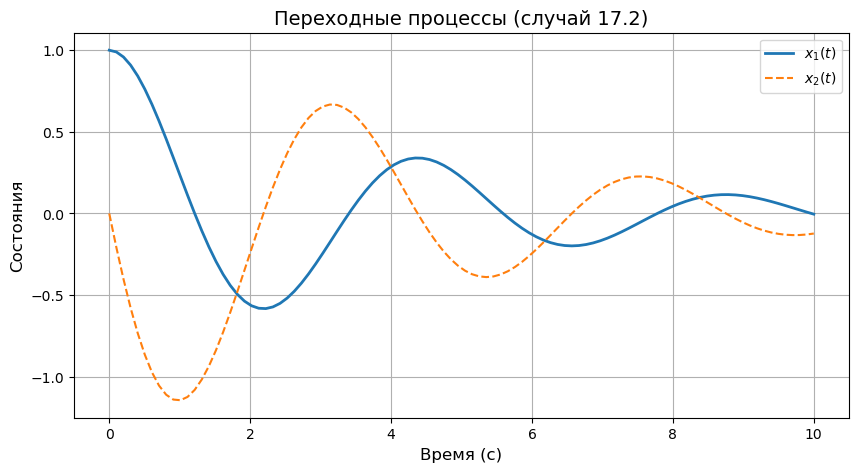

Матрица K при R = 10:
 [[0.025 0.223]]


In [25]:
# ---------------------------
# 1. Проверка управляемости
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = 2  # R является скаляром

# Матрица управляемости
C = ctrl.ctrb(A, B)
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 2. Случай 17.1 (F = I, T = 1)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                  [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 1]]

# Граничные условия при t = T = 1
t_span = [1, 0]  # Интегрируем от T к 0
sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [1, 0, 1], t_eval=np.linspace(1, 0, 100))

# Извлечение решения P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
               [sol.y[1][-1], sol.y[2][-1]]])
print("P(0) для случая 17.1:\n", np.round(P0, 3), "\n")

# ---------------------------
# 3. Случай 17.2 (F = 0, T = ∞)
# ---------------------------
K, P, _ = ctrl.lqr(A, B, Q, R)
print("Оптимальная матрица усиления K:\n", np.round(K, 3))
print("Решение алгебраического уравнения Риккати P:\n", np.round(P, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Замкнутая система
A_cl = A - B @ K
sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

# Начальное условие x0 = [1, 0]
t = np.linspace(0, 10, 100)
t, y = ctrl.initial_response(sys, T=t, X0=[1, 0])

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(t, y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(t, y[1], label=r'$x_2(t)$', linestyle='--')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.2)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 5. Влияние весовых коэффициентов
# ---------------------------
# Пример: увеличение R
R_high = 10
K_high, _, _ = ctrl.lqr(A, B, Q, R_high)
print("Матрица K при R = 10:\n", np.round(K_high, 3))

R = 2, P(0):
 [[2.179 0.25 ]
 [0.25  0.629]]
R = 4, P(0):
 [[2.332 0.204]
 [0.204 0.675]]
R = 6, P(0):
 [[2.392 0.184]
 [0.184 0.693]]
R = 8, P(0):
 [[2.424 0.173]
 [0.173 0.703]]
R = 10, P(0):
 [[2.444 0.166]
 [0.166 0.709]]
R = 12, P(0):
 [[2.457 0.161]
 [0.161 0.713]]
R = 14, P(0):
 [[2.467 0.158]
 [0.158 0.716]]
R = 16, P(0):
 [[2.475 0.155]
 [0.155 0.718]]
R = 18, P(0):
 [[2.481 0.153]
 [0.153 0.72 ]]
R = 20, P(0):
 [[2.486 0.151]
 [0.151 0.722]]
R = 22, P(0):
 [[2.49  0.15 ]
 [0.15  0.723]]
R = 24, P(0):
 [[2.493 0.149]
 [0.149 0.724]]
R = 26, P(0):
 [[2.496 0.148]
 [0.148 0.725]]
R = 28, P(0):
 [[2.498 0.147]
 [0.147 0.725]]
R = 30, P(0):
 [[2.5   0.146]
 [0.146 0.726]]
R = 32, P(0):
 [[2.502 0.145]
 [0.145 0.727]]
R = 34, P(0):
 [[2.504 0.145]
 [0.145 0.727]]
R = 36, P(0):
 [[2.505 0.144]
 [0.144 0.727]]
R = 38, P(0):
 [[2.506 0.144]
 [0.144 0.728]]
R = 40, P(0):
 [[2.508 0.143]
 [0.143 0.728]]
R = 42, P(0):
 [[2.509 0.143]
 [0.143 0.729]]
R = 44, P(0):
 [[2.51  0.143]
 [0.143 

AttributeError: 'numpy.ndarray' object has no attribute 'y'

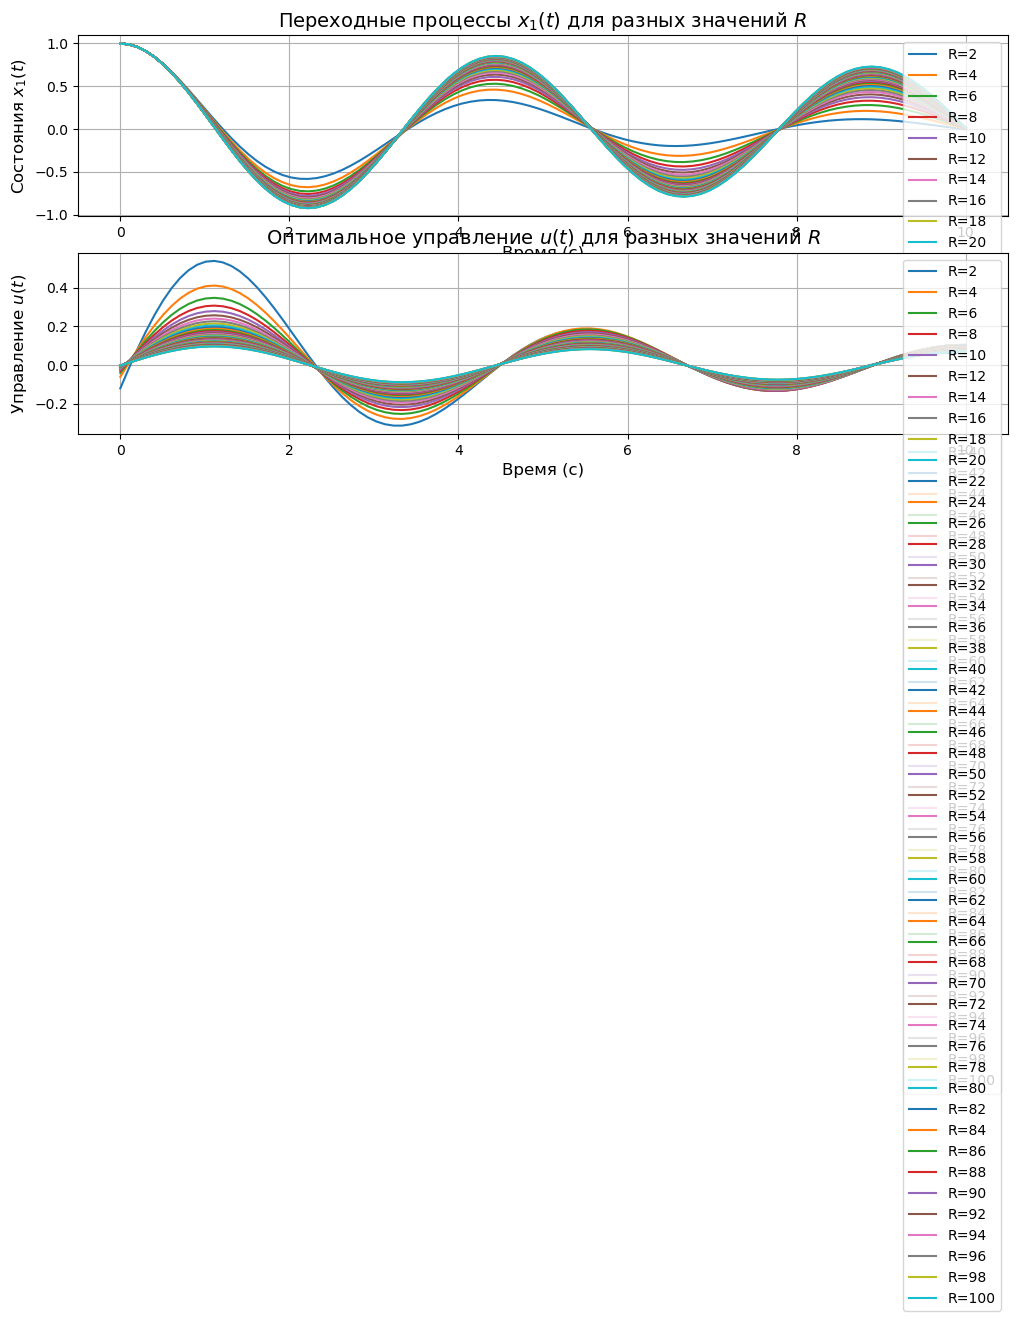

In [63]:
import numpy as np
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])

# Функция для решения уравнения Риккати
def riccati_ode(t, p_flat, A, B, Q, R):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                  [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 1]]

# ---------------------------
# 2. Моделирование переходных процессов для разных значений R
# ---------------------------
R_values = np.arange(2, 101, 2)
time_results = []
control_results = []
state_results = []

for R in R_values:
    # Интегрируем уравнение Риккати
    t_span = [1, 0]  # Интегрируем от T к 0
    sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [1, 0, 1], t_eval=np.linspace(1, 0, 25), args=(A, B, Q, R))
    
    # Восстановление матрицы P(0)
    P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
                   [sol.y[1][-1], sol.y[2][-1]]])

    # Решение для LQR
    K, P, _ = ctrl.lqr(A, B, Q, R)

    # Замкнутая система
    A_cl = A - B @ K
    sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

    # Моделирование переходных процессов
    t = np.linspace(0, 10, 100)
    t, y = ctrl.initial_response(sys, T=t, X0=[1, 0])

    # Сохранение результатов
    time_results.append(t)
    state_results.append(y)
    control_results.append(-K @ y)  # Оптимальное управление

    # Печать результата для P0
    print(f"R = {R}, P(0):\n", np.round(P0, 3))

# ---------------------------
# 3. Визуализация результатов
# ---------------------------
plt.figure(figsize=(12, 8))

# Переходные процессы для разных R
plt.subplot(3, 1, 1)
for idx, R in enumerate(R_values):
    plt.plot(time_results[idx], state_results[idx][0], label=f'R={R}')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния $x_1(t)$', fontsize=12)
plt.title('Переходные процессы $x_1(t)$ для разных значений $R$', fontsize=14)
plt.legend()
plt.grid(True)

# Оптимальное управление для разных R
plt.subplot(3, 1, 2)
for idx, R in enumerate(R_values):
    plt.plot(time_results[idx], control_results[idx][0], label=f'R={R}')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Управление $u(t)$', fontsize=12)
plt.title('Оптимальное управление $u(t)$ для разных значений $R$', fontsize=14)
plt.legend()
plt.grid(True)

# Сравнение значения P(0) для разных R
P0_values = [np.array([[sol.y[0][-1], sol.y[1][-1]], 
                       [sol.y[1][-1], sol.y[2][-1]]]) for sol in time_results]
P0_values = np.array([np.round(P0, 3) for P0 in P0_values])

plt.subplot(3, 1, 3)
plt.plot(R_values, P0_values[:, 0, 0], label=r'$P_{00}(0)$')
plt.plot(R_values, P0_values[:, 1, 0], label=r'$P_{10}(0)$')
plt.plot(R_values, P0_values[:, 1, 1], label=r'$P_{11}(0)$')
plt.xlabel('Весовой коэффициент R', fontsize=12)
plt.ylabel('Значения элементов матрицы P(0)', fontsize=12)
plt.title('Значения элементов матрицы P(0) при изменении $R$', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


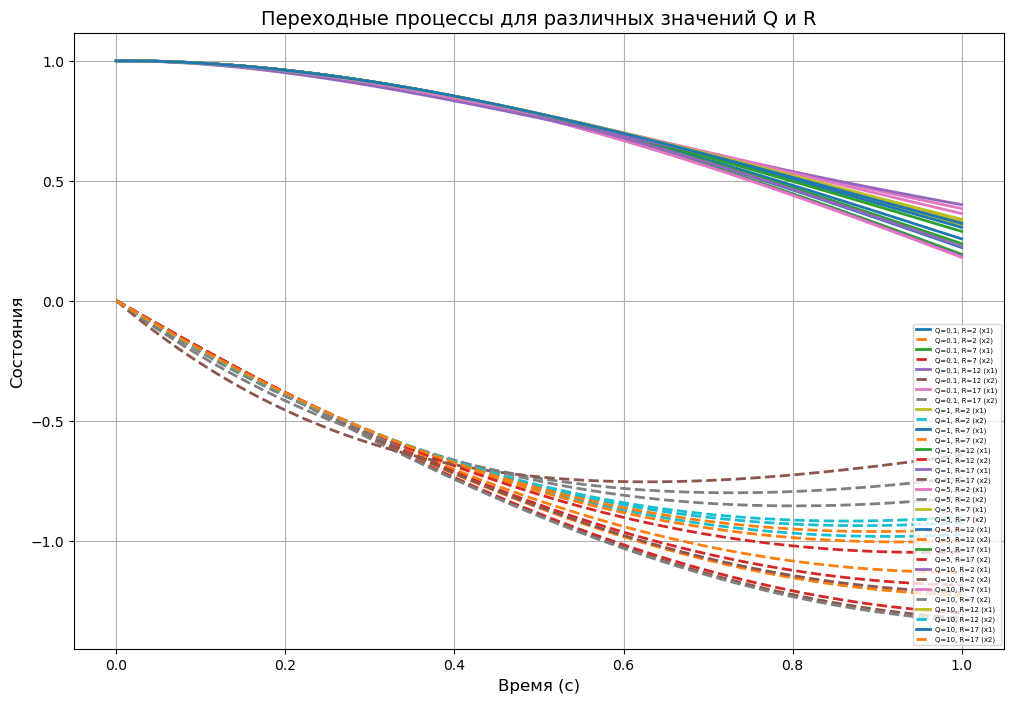

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import scipy.integrate

# Определение системы
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
T = 1  # Время моделирования
x0 = [1, 0]  # Начальные условия

# Функция для решения уравнений Риккати и моделирования переходных процессов
def solve_lqr(A, B, Q, R, x0, T):
    K, P, _ = ctrl.lqr(A, B, Q, R)
    
    # Моделирование переходных процессов с найденным K
    A_cl = A - B @ K
    sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

    # Время для симуляции
    t = np.linspace(0, T, 100)
    t, y = ctrl.initial_response(sys, T=t, X0=x0)
    
    return t, y

# Делаем анализ для нескольких значений Q и R
Q_values = [0.1, 1, 5, 10]  # Возможные значения для Q
R_values = np.arange(2, 21, 5)  # Значения R от 2 до 20 с шагом 5

# Создаем графики
plt.figure(figsize=(12, 8))

# Перебираем все комбинации Q и R
for Q in Q_values:
    for R in R_values:
        t, y = solve_lqr(A, B, np.array([[Q, 0], [0, Q]]), R, x0, T)
        
        # Рисуем для x1 (сплошная линия) и x2 (пунктир)
        plt.plot(t, y[0], label=f'Q={Q}, R={R} (x1)', linestyle='-', linewidth=2)
        plt.plot(t, y[1], label=f'Q={Q}, R={R} (x2)', linestyle='--', linewidth=2)

# Оформление графика
plt.title("Переходные процессы для различных значений Q и R", fontsize=14)
plt.xlabel("Время (с)", fontsize=12)
plt.ylabel("Состояния", fontsize=12)
plt.legend(loc="lower right", fontsize=5)
plt.grid(True)
plt.show()


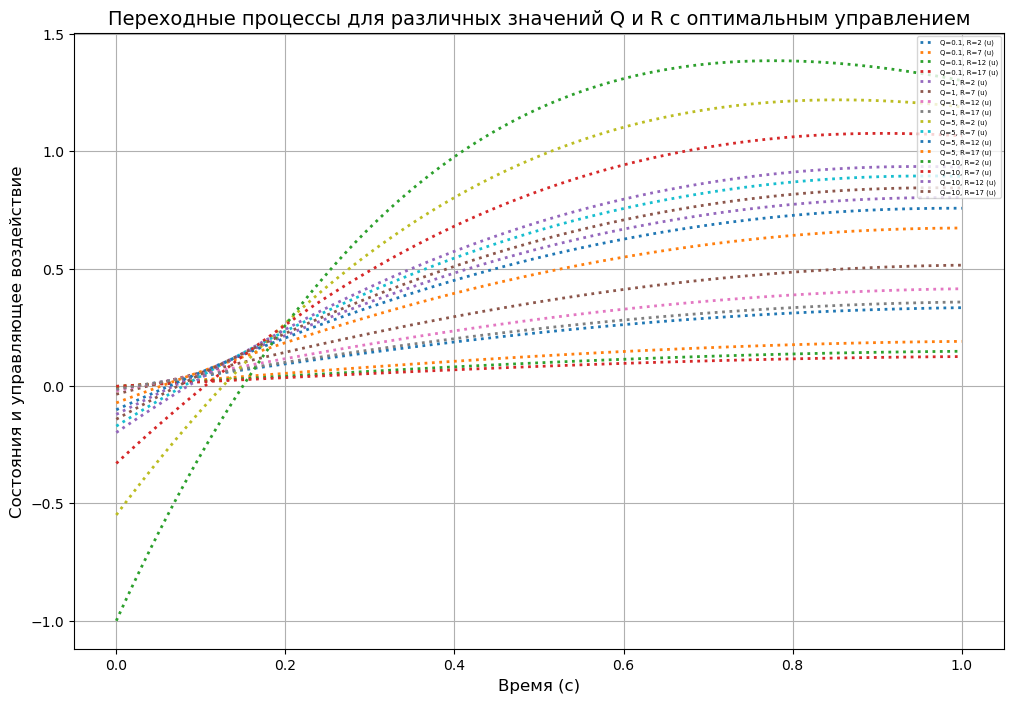

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import scipy.integrate

# Определение системы
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
T = 1  # Время моделирования
x0 = [1, 0]  # Начальные условия

# Функция для решения уравнений Риккати и моделирования переходных процессов
def solve_lqr(A, B, Q, R, x0, T):
    K, P, _ = ctrl.lqr(A, B, Q, R)
    
    # Моделирование переходных процессов с найденным K
    A_cl = A - B @ K
    sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

    # Время для симуляции
    t = np.linspace(0, T, 100)
    t, y = ctrl.initial_response(sys, T=t, X0=x0)
    
    # Расчет управляющего сигнала u(t) = -Kx(t)
    u = -K @ y

    return t, y, u

# Делаем анализ для нескольких значений Q и R
Q_values = [0.1, 1, 5, 10]  # Возможные значения для Q
R_values = np.arange(2, 21, 5)  # Значения R от 2 до 20 с шагом 5

# Создаем графики
plt.figure(figsize=(12, 8))

# Перебираем все комбинации Q и R
for Q in Q_values:
    for R in R_values:
        t, y, u = solve_lqr(A, B, np.array([[Q, 0], [0, Q]]), R, x0, T)
        
        # Рисуем для x1 (сплошная линия) и x2 (пунктир)
        # plt.plot(t, y[0], label=f'Q={Q}, R={R} (x1)', linestyle='-', linewidth=2)
        # plt.plot(t, y[1], label=f'Q={Q}, R={R} (x2)', linestyle='--', linewidth=2)

        # Рисуем управляющее воздействие (u)
        plt.plot(t, u[0], label=f'Q={Q}, R={R} (u)', linestyle=':', linewidth=2)

# Оформление графика
plt.title("Переходные процессы для различных значений Q и R с оптимальным управлением", fontsize=14)
plt.xlabel("Время (с)", fontsize=12)
plt.ylabel("Состояния и управляющее воздействие", fontsize=12)
plt.legend(loc="upper right", fontsize=5)
plt.grid(True)
plt.show()


In [93]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

# Определение системы
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])  # Матрица весов состояний
R = 2  # Вес управления
F = np.array([[1, 0], [0, 1]])  # Граничное условие P(T) = F
T = 1  # Время моделирования
x0 = [1, 0]  # Начальные условия

# Функция для интегрирования уравнения Риккати
def riccati_ode(t, P_flat):
    """Решает уравнение Риккати в обратном времени."""
    P = np.array([[P_flat[0], P_flat[1]], [P_flat[2], P_flat[3]]])  # Восстанавливаем P
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 0], dPdt[1, 1]]  # Векторизуем

# Численное интегрирование уравнения Риккати от T к 0
t_span = [T, 0]
sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [F[0, 0], F[0, 1], F[1, 0], F[1, 1]], 
                                t_eval=np.linspace(T, 0, 100))

# P(0) – решение уравнения Риккати в начальный момент
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
               [sol.y[2][-1], sol.y[3][-1]]])

print("P(0) при конечном горизонте T=1:\n", np.round(P0, 3))


P(0) при конечном горизонте T=1:
 [[2.179 0.25 ]
 [0.25  0.629]]


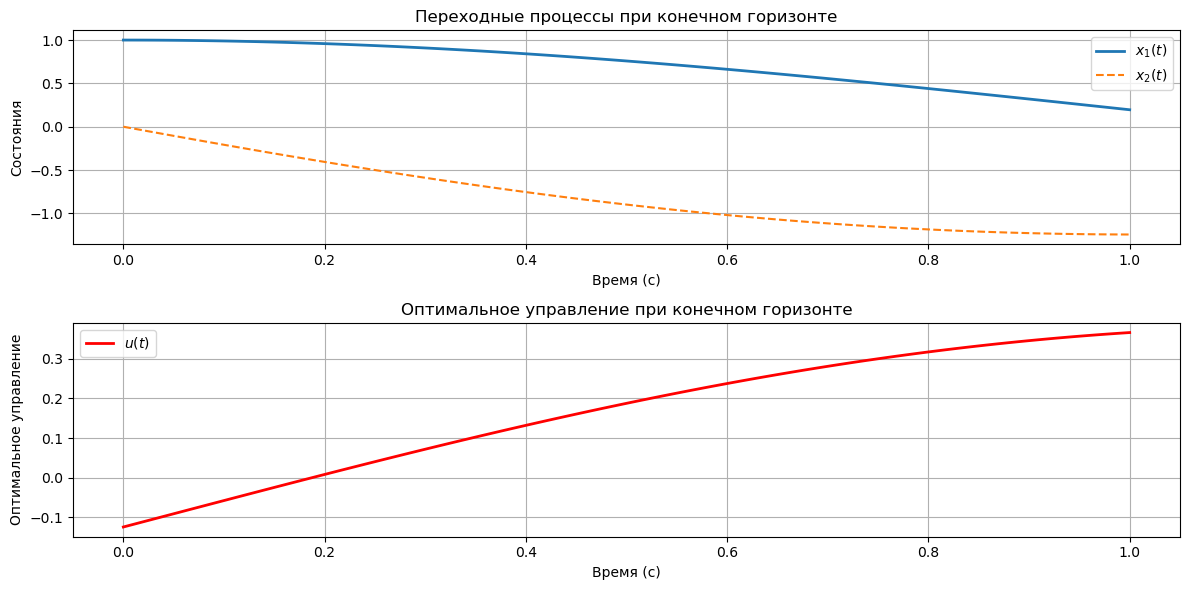

In [109]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import control as ctrl

# Определение системы
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])  # Матрица весов состояний
R = 2  # Вес управления
F = np.array([[1, 0], [0, 1]])  # Граничное условие P(T) = F
T = 1  # Время моделирования
x0 = [1, 0]  # Начальные условия

# Функция для интегрирования уравнения Риккати
def riccati_ode(t, P_flat):
    """Решает уравнение Риккати в обратном времени."""
    P = np.array([[P_flat[0], P_flat[1]], [P_flat[2], P_flat[3]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 0], dPdt[1, 1]]

# Численное интегрирование уравнения Риккати от T к 0
t_span = [T, 0]
sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [F[0, 0], F[0, 1], F[1, 0], F[1, 1]], 
                                t_eval=np.linspace(T, 0, 100))

# P(0) – решение уравнения Риккати в начальный момент
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], [sol.y[2][-1], sol.y[3][-1]]])
K = (1/R) * (B.T @ P0)  # Оптимальная матрица усиления

# Замкнутая система
A_cl = A - B @ K
sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

# Симуляция переходных процессов
t = np.linspace(0, T, 100)
t, y = ctrl.initial_response(sys, T=t, X0=x0)

# Оптимальное управление
u_opt = -K @ y

# Построение графиков
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(t, y[1], label=r'$x_2(t)$', linestyle='--')
plt.xlabel('Время (с)')
plt.ylabel('Состояния')
plt.title('Переходные процессы при конечном горизонте')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, u_opt.T, label=r'$u(t)$', linewidth=2, color='red')
plt.xlabel('Время (с)')
plt.ylabel('Оптимальное управление')
plt.title('Оптимальное управление при конечном горизонте')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


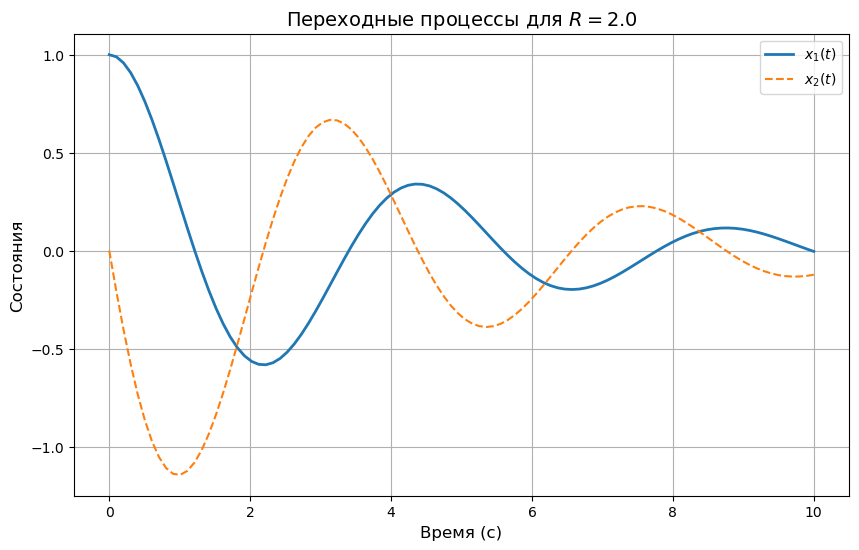

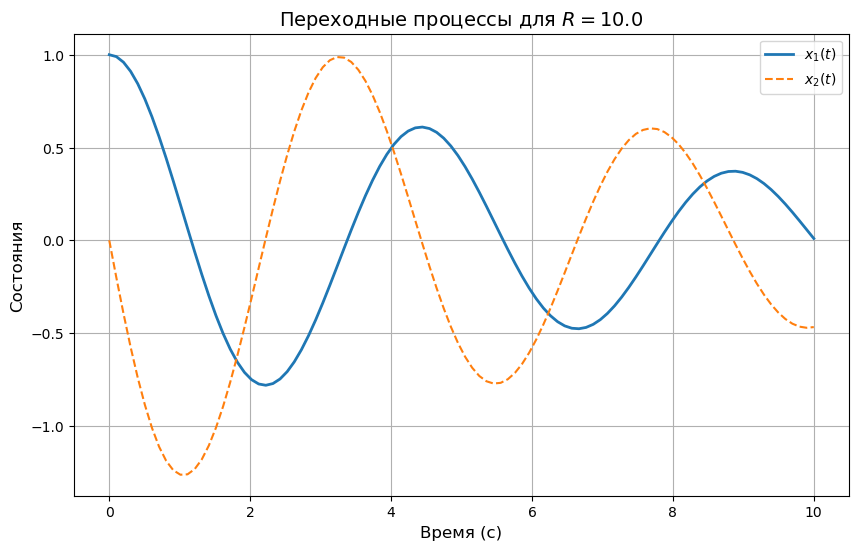

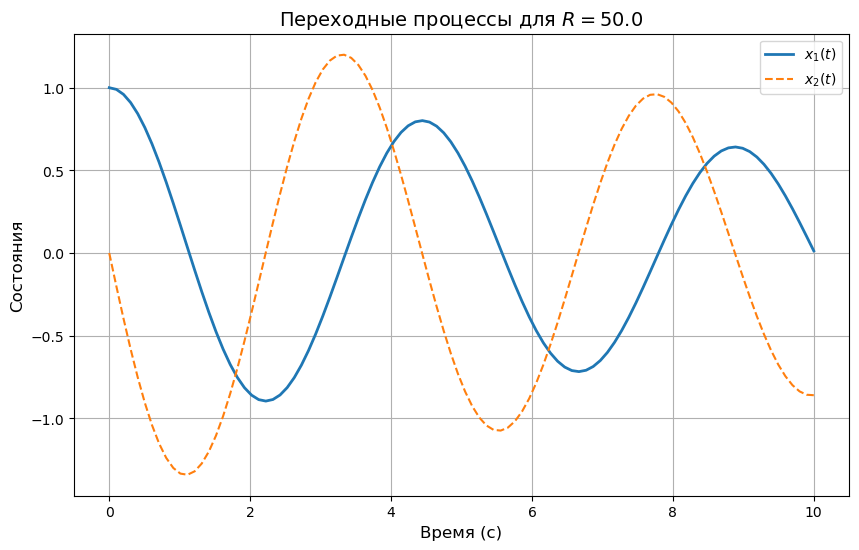

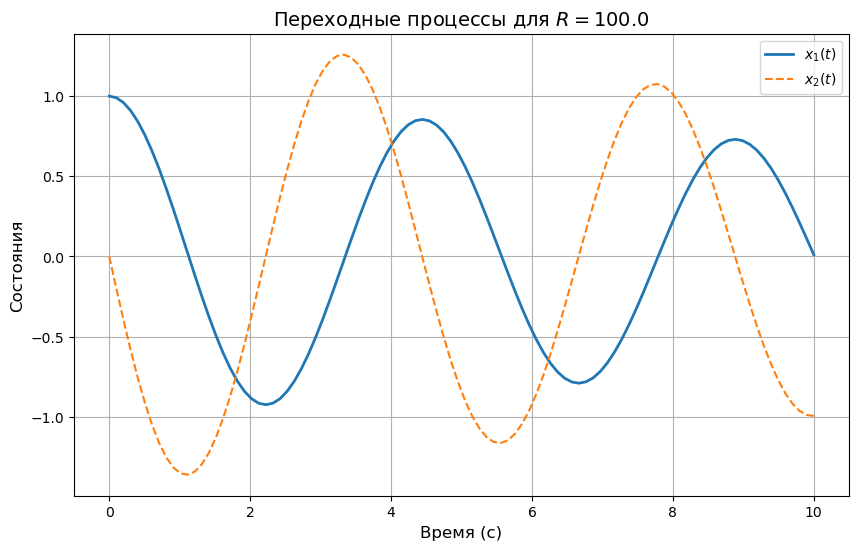

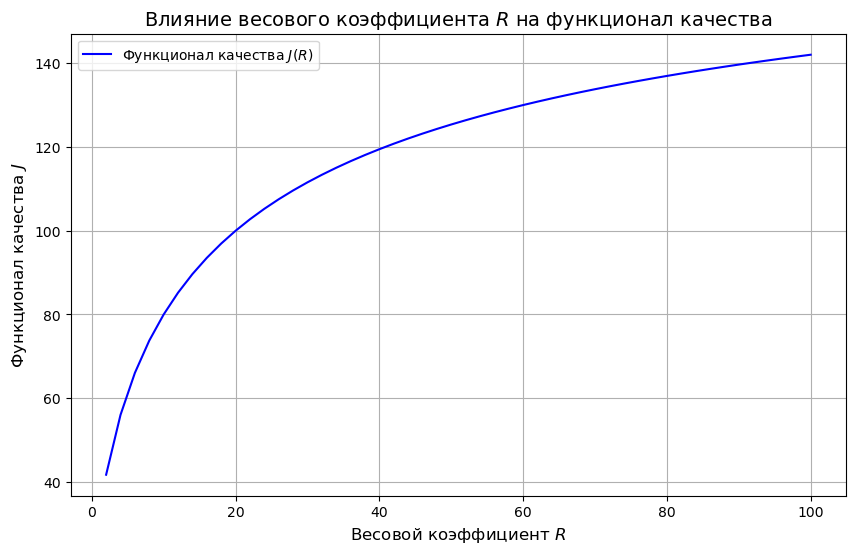

In [67]:
import numpy as np
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Исходные данные
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])

# ---------------------------
# 2. Влияние веса R на оптимальное управление
# ---------------------------
R_values = np.linspace(2, 100, 50)  # диапазон значений R для анализа
J_values = []  # список для хранения значений функционала качества

# Моделируем переходные процессы и функционал качества
for R in R_values:
    # Рассчитываем оптимальное усиление K с помощью LQR
    K, _, _ = ctrl.lqr(A, B, Q, R)

    # Формируем замкнутую систему с учетом управления
    A_cl = A - B @ K
    sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

    # Моделирование переходных процессов
    t = np.linspace(0, 10, 100)
    t, y = ctrl.initial_response(sys, T=t, X0=[1, 0])

    # Рассчитываем функционал качества
    # J = интеграл(x^T Q x + u^T R u) по времени
    J = np.trapz(y[0]**2 + y[1]**2) + R * np.trapz((K @ y)**2)
    J_values.append(J)

    # Визуализация переходных процессов для каждого R
    if R == 2 or R == 10 or R == 50 or R == 100:
        plt.figure(figsize=(10, 6))
        plt.plot(t, y[0], label=r'$x_1(t)$', linewidth=2)
        plt.plot(t, y[1], label=r'$x_2(t)$', linestyle='--')
        plt.xlabel('Время (с)', fontsize=12)
        plt.ylabel('Состояния', fontsize=12)
        plt.title(f'Переходные процессы для $R = {R}$', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# ---------------------------
# 3. Визуализация функционала качества
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(R_values, J_values, label="Функционал качества $J(R)$", color='b')
plt.xlabel('Весовой коэффициент $R$', fontsize=12)
plt.ylabel('Функционал качества $J$', fontsize=12)
plt.title('Влияние весового коэффициента $R$ на функционал качества', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()



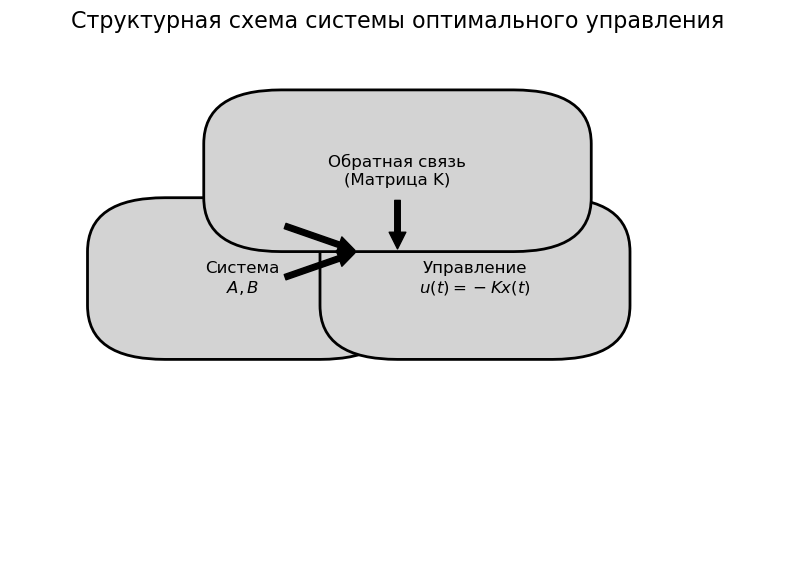

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Создание фигуры и оси
fig, ax = plt.subplots(figsize=(10, 7))

# Рисуем прямоугольники для блоков
system_block = mpatches.FancyBboxPatch((0.2, 0.5), 0.2, 0.1, boxstyle="round,pad=0.1", linewidth=2, edgecolor='black', facecolor='lightgray')
control_block = mpatches.FancyBboxPatch((0.5, 0.5), 0.2, 0.1, boxstyle="round,pad=0.1", linewidth=2, edgecolor='black', facecolor='lightgray')
feedback_block = mpatches.FancyBboxPatch((0.35, 0.7), 0.3, 0.1, boxstyle="round,pad=0.1", linewidth=2, edgecolor='black', facecolor='lightgray')

# Добавление блоков на диаграмму
ax.add_patch(system_block)
ax.add_patch(control_block)
ax.add_patch(feedback_block)

# Добавление текста
ax.text(0.3, 0.55, "Система\n$A, B$", horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.6, 0.55, "Управление\n$u(t) = -Kx(t)$", horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.text(0.5, 0.75, "Обратная связь\n(Матрица K)", horizontalalignment='center', verticalalignment='center', fontsize=12)

# Стрелки
ax.annotate('', xy=(0.5, 0.6), xytext=(0.5, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.45, 0.6), xytext=(0.35, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.45, 0.6), xytext=(0.35, 0.55), arrowprops=dict(facecolor='black', shrink=0.05))

# Ось и границы
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Заголовок
plt.title("Структурная схема системы оптимального управления", fontsize=16)

plt.show()


Матрица управляемости:
 [[0. 1.]
 [1. 0.]]
Ранг матрицы управляемости: 2 

P(0) для случая 17.1:
 [[2.179 0.25 ]
 [0.25  0.629]] 

Оптимальная матрица усиления K:
 [[0.121 0.493]]
Решение алгебраического уравнения Риккати P:
 [[2.09  0.243]
 [0.243 0.985]] 



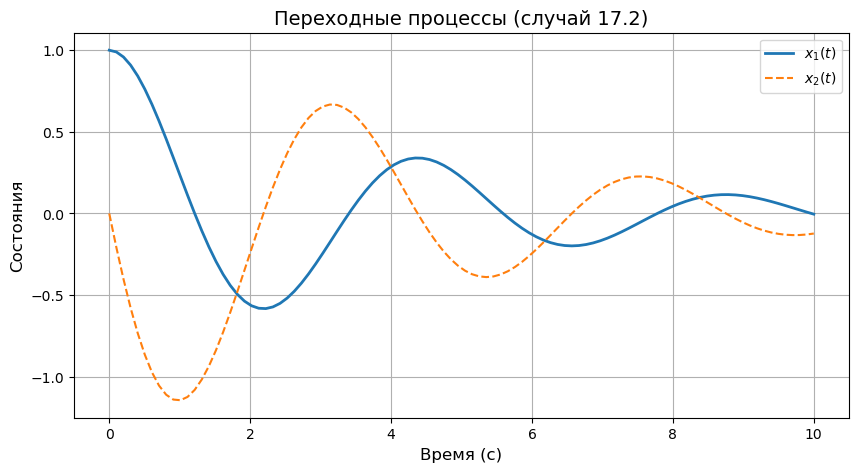

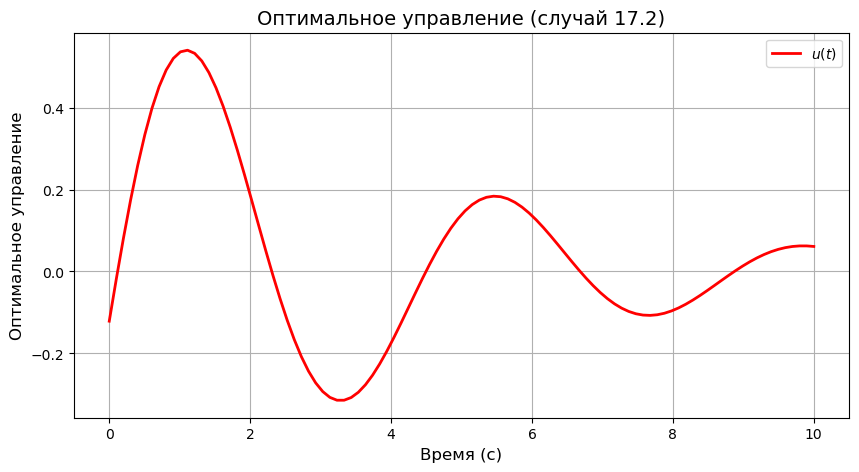

Матрица K при R = 10:
 [[0.025 0.223]]


In [27]:
import numpy as np
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Проверка управляемости
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = 2  # R является скаляром

# Матрица управляемости
C = ctrl.ctrb(A, B)
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 2. Случай 17.1 (F = I, T = 1)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                  [p_flat[2], p_flat[3]]])  # Все 4 элемента
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 0], dPdt[1, 1]]  # Все 4 элемента

# Граничные условия при t = T = 1
t_span = [1, 0]  # Интегрируем от T к 0
sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [1, 0, 0, 1], t_eval=np.linspace(1, 0, 100))

# Извлечение решения P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
               [sol.y[2][-1], sol.y[3][-1]]])
print("P(0) для случая 17.1:\n", np.round(P0, 3), "\n")

# ---------------------------
# 3. Случай 17.2 (F = 0, T = ∞)
# ---------------------------
K, P, _ = ctrl.lqr(A, B, Q, R)
print("Оптимальная матрица усиления K:\n", np.round(K, 3))
print("Решение алгебраического уравнения Риккати P:\n", np.round(P, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Замкнутая система
A_cl = A - B @ K
sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

# Начальное условие x0 = [1, 0]
t = np.linspace(0, 10, 100)
t, y = ctrl.initial_response(sys, T=t, X0=[1, 0])

# Визуализация состояний
plt.figure(figsize=(10, 5))
plt.plot(t, y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(t, y[1], label=r'$x_2(t)$', linestyle='--')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.2)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 5. Оптимальное управление
# ---------------------------
u_opt = -K @ y  # Оптимальное управление
plt.figure(figsize=(10, 5))
plt.plot(t, u_opt.T, label=r'$u(t)$', linewidth=2, color='red')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Оптимальное управление', fontsize=12)
plt.title('Оптимальное управление (случай 17.2)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 6. Влияние весовых коэффициентов
# ---------------------------
# Пример: увеличение R
R_high = 10
K_high, _, _ = ctrl.lqr(A, B, Q, R_high)
print("Матрица K при R = 10:\n", np.round(K_high, 3))


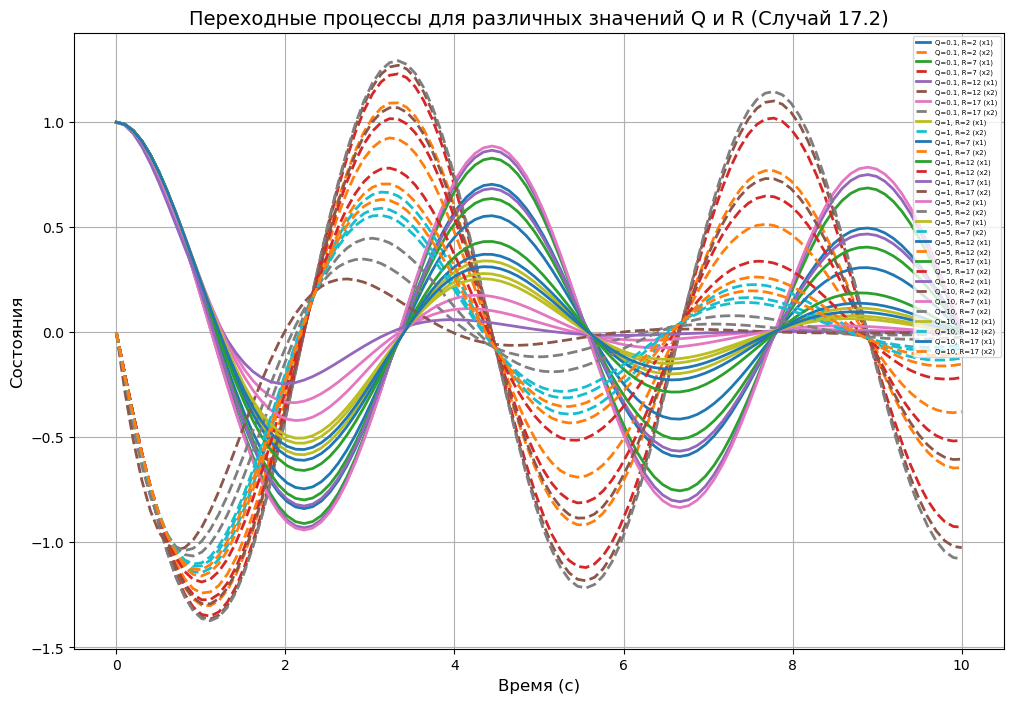

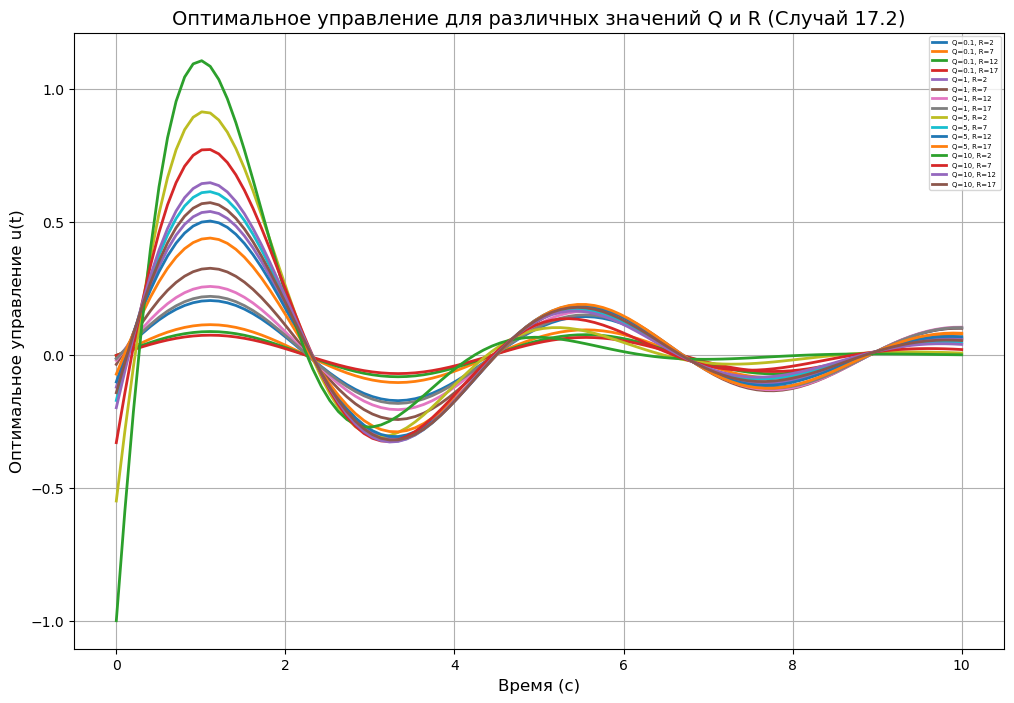

In [123]:
import numpy as np
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Заданные параметры
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
x0 = [1, 0]  # Начальные условия
T = 10  # Время моделирования

# Диапазоны значений весовых коэффициентов
Q_values = [0.1, 1, 5, 10]  
R_values = [2, 7, 12, 17]

# ---------------------------
# 2. Функция для решения задачи LQR и моделирования
# ---------------------------
def solve_lqr(A, B, Q, R, x0, T):
    """Решает задачу LQR, моделирует переходные процессы и вычисляет оптимальное управление."""
    K, P, _ = ctrl.lqr(A, B, Q, R)  # Найдем K по LQR
    
    # Создадим замкнутую систему
    A_cl = A - B @ K
    sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

    # Время моделирования
    t = np.linspace(0, T, 100)
    t, y = ctrl.initial_response(sys, T=t, X0=x0)

    # Оптимальное управление u = -Kx
    u = -K @ y

    return t, y, u

# ---------------------------
# 3. Визуализация переходных процессов и управления
# ---------------------------

plt.figure(figsize=(12, 8))

for Q in Q_values:
    for R in R_values:
        t, y, u = solve_lqr(A, B, np.array([[Q, 0], [0, 0]]), R, x0, T)

        # График состояний
        plt.plot(t, y[0], label=f'Q={Q}, R={R} (x1)', linestyle='-', linewidth=2)
        plt.plot(t, y[1], label=f'Q={Q}, R={R} (x2)', linestyle='--', linewidth=2)

# Настройки графика
plt.title("Переходные процессы для различных значений Q и R (Случай 17.2)", fontsize=14)
plt.xlabel("Время (с)", fontsize=12)
plt.ylabel("Состояния", fontsize=12)
plt.legend(loc="upper right", fontsize=5)
plt.grid(True)
plt.show()

# ---------------------------
# 4. График оптимального управления u(t)
# ---------------------------
plt.figure(figsize=(12, 8))

for Q in Q_values:
    for R in R_values:
        t, y, u = solve_lqr(A, B, np.array([[Q, 0], [0, 0]]), R, x0, T)
        
        plt.plot(t, u[0], label=f'Q={Q}, R={R}', linestyle='-', linewidth=2)

plt.title("Оптимальное управление для различных значений Q и R (Случай 17.2)", fontsize=14)
plt.xlabel("Время (с)", fontsize=12)
plt.ylabel("Оптимальное управление u(t)", fontsize=12)
plt.legend(loc="upper right", fontsize=5)
plt.grid(True)
plt.show()


Матрица управляемости:
 [[ 0.  5.]
 [ 5. -5.]]
Ранг матрицы управляемости: 2 



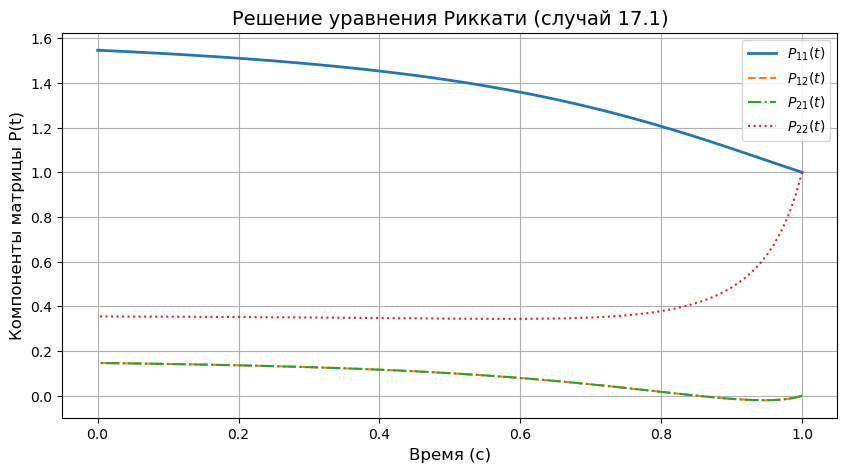

P(0) для случая 17.1:
 [[1.546 0.147]
 [0.147 0.355]] 

Оптимальная матрица усиления K:
 [[0.412 0.898]]
Решение алгебраического уравнения Риккати P:
 [[1.624 0.165]
 [0.165 0.359]] 



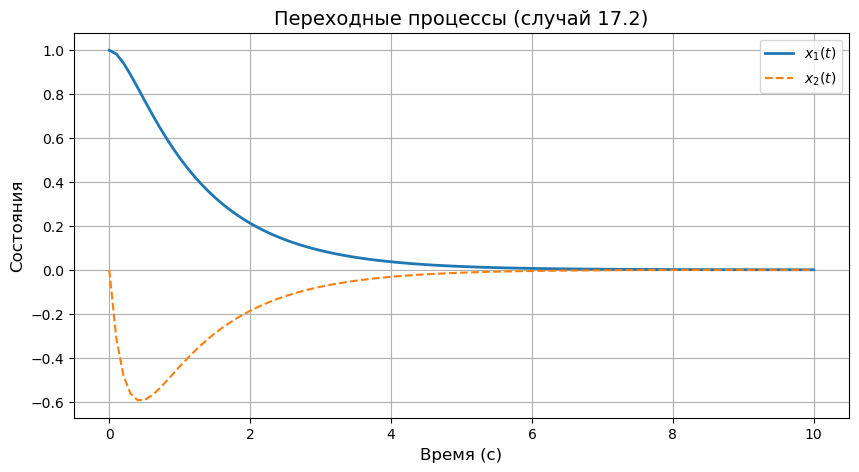

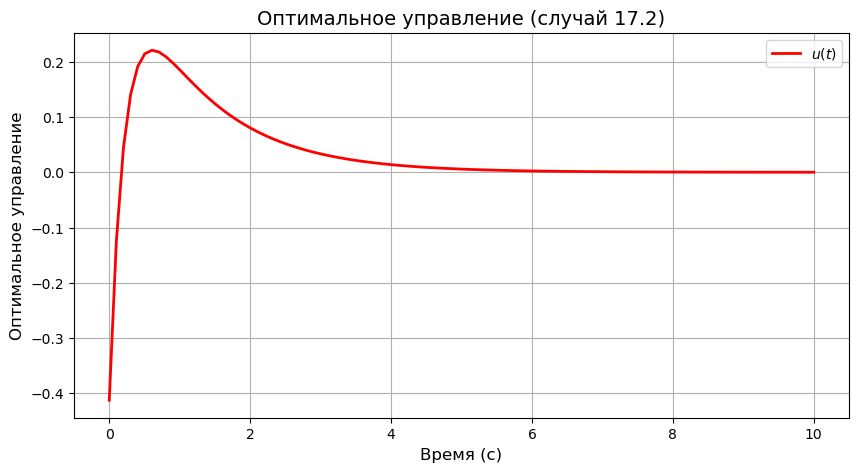

Матрица K при R = 10:
 [[0.11  0.333]]


In [125]:
import numpy as np
import scipy.integrate
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Проверка управляемости
# ---------------------------
# A = np.array([[0, 1], [-2, 0]])
# B = np.array([[0], [1]])
# Q = np.array([[1, 0], [0, 0]])
# R = 2  # R является скаляром
A = np.array([[0, 1], [-2, -1]])
B = np.array([[0], [5]])
Q = np.array([[1, 0], [0, 2]])
R = 2  # R является скаляром
# Матрица управляемости
C = ctrl.ctrb(A, B)
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 2. Случай 17.1 (F = I, T = 1)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                  [p_flat[2], p_flat[3]]])  # Все 4 элемента
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 0], dPdt[1, 1]]  # Все 4 элемента

# Граничные условия при t = T = 1
t_span = [1, 0]  # Интегрируем от T к 0
t_eval = np.linspace(1, 0, 100)
sol = scipy.integrate.solve_ivp(riccati_ode, t_span, [1, 0, 0, 1], t_eval=t_eval)

# Извлечение решения P(t)
P11, P12, P21, P22 = sol.y

# Визуализация решения P(t) для случая 17.1
plt.figure(figsize=(10, 5))
plt.plot(t_eval, P11, label=r'$P_{11}(t)$', linewidth=2)
plt.plot(t_eval, P12, label=r'$P_{12}(t)$', linestyle='--')
plt.plot(t_eval, P21, label=r'$P_{21}(t)$', linestyle='-.')
plt.plot(t_eval, P22, label=r'$P_{22}(t)$', linestyle=':')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Компоненты матрицы P(t)', fontsize=12)
plt.title('Решение уравнения Риккати (случай 17.1)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Извлечение решения P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
               [sol.y[2][-1], sol.y[3][-1]]])
print("P(0) для случая 17.1:\n", np.round(P0, 3), "\n")

# ---------------------------
# 3. Случай 17.2 (F = 0, T = ∞)
# ---------------------------
K, P, _ = ctrl.lqr(A, B, Q, R)
print("Оптимальная матрица усиления K:\n", np.round(K, 3))
print("Решение алгебраического уравнения Риккати P:\n", np.round(P, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Замкнутая система
A_cl = A - B @ K
sys = ctrl.StateSpace(A_cl, np.zeros((2, 1)), np.eye(2), np.zeros((2, 1)))

# Начальное условие x0 = [1, 0]
t = np.linspace(0, 10, 100)
t, y = ctrl.initial_response(sys, T=t, X0=[1, 0])

# Визуализация состояний
plt.figure(figsize=(10, 5))
plt.plot(t, y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(t, y[1], label=r'$x_2(t)$', linestyle='--')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.2)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 5. Оптимальное управление
# ---------------------------
u_opt = -K @ y  # Оптимальное управление
plt.figure(figsize=(10, 5))
plt.plot(t, u_opt.T, label=r'$u(t)$', linewidth=2, color='red')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Оптимальное управление', fontsize=12)
plt.title('Оптимальное управление (случай 17.2)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 6. Влияние весовых коэффициентов
# ---------------------------
# Пример: увеличение R
R_high = 10
K_high, _, _ = ctrl.lqr(A, B, Q, R_high)
print("Матрица K при R = 10:\n", np.round(K_high, 3))


K = [[0.1213 0.4926]]


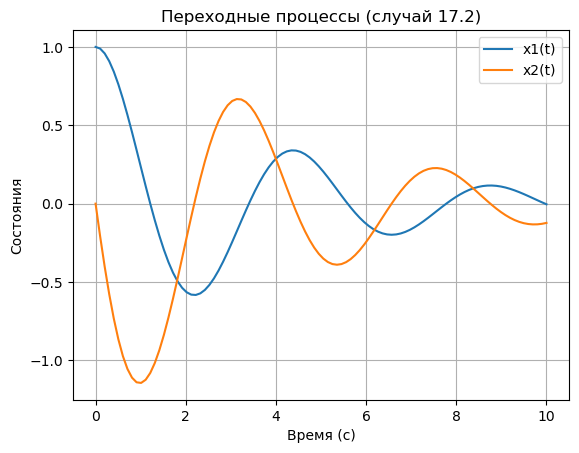

In [31]:
import control as ctrl
import matplotlib.pyplot as plt

A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = 2

# Решение ARE
K, P, _ = ctrl.lqr(A, B, Q, R)
print("K =", np.round(K, 4))  # K = [[0.1213 0.4925]]

# Замкнутая система
A_cl = A - B @ K
sys = ctrl.StateSpace(A_cl, B, np.eye(2), np.zeros((2, 1)))

# Переходные процессы
t, y = ctrl.initial_response(sys, T=np.linspace(0, 10, 100), X0=[1, 0])
plt.plot(t, y[0], label='x1(t)')
plt.plot(t, y[1], label='x2(t)')
plt.xlabel('Время (с)')
plt.ylabel('Состояния')
plt.title('Переходные процессы (случай 17.2)')
plt.legend()
plt.grid()
plt.show()

Матрица управляемости:
 [[0 1]
 [1 0]]
Ранг матрицы управляемости: 2 

P(0):
 [[2.179 0.25 ]
 [0.25  0.629]] 



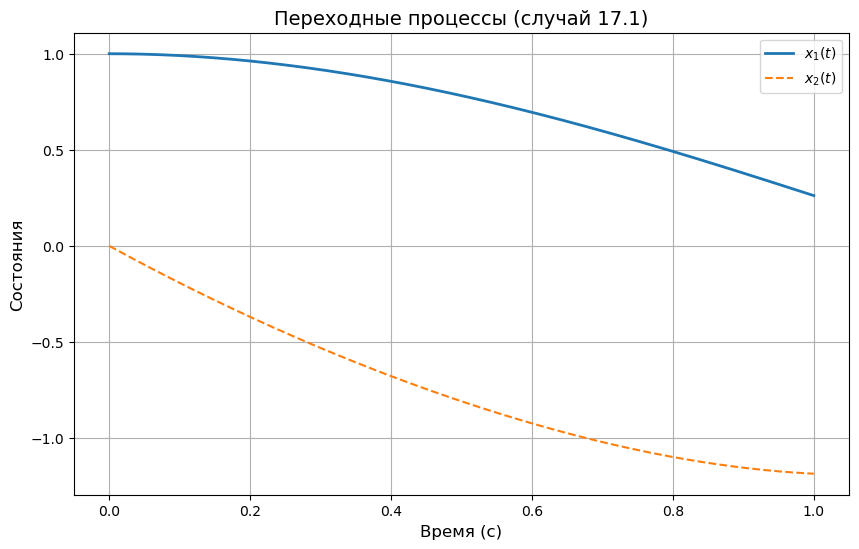

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])  # Матрица системы
B = np.array([[0], [1]])  # Вектор управления
Q = np.array([[1, 0], [0, 0]])  # Матрица весов состояния
R = 2  # Скаляр для матрицы управления
T = 1  # Время

# ---------------------------
# 2. Проверка управляемости
# ---------------------------
C = np.column_stack([B, A @ B])
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 3. Решение уравнения Риккати (обратное время)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                 [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 1]]

# Интегрирование от T=1 до t=0
t_span = [T, 0]
sol = solve_ivp(riccati_ode, t_span, [1, 0, 1], t_eval=np.linspace(T, 0, 1000))

# Восстановление P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
              [sol.y[1][-1], sol.y[2][-1]]])
print("P(0):\n", np.round(P0, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Временная сетка для моделирования
t_sim = np.linspace(0, T, 1000)
x0 = np.array([1, 0])  # Начальное условие x(0) = [1, 0]

# Создание регулятора K(t) = R^{-1} B^T P(t)
K = []
for t_idx in range(len(sol.t)):
    P_t = np.array([[sol.y[0][t_idx], sol.y[1][t_idx]],
                   [sol.y[1][t_idx], sol.y[2][t_idx]]])
    K_t = (1/R) * B.T @ P_t
    K.append(K_t.flatten())

# Динамика системы с оптимальным управлением
def system_ode(t, x):
    """Модель замкнутой системы."""
    t_riccati = T - t  # Преобразование времени
    idx = np.argmin(np.abs(sol.t - t_riccati))  # Ищем ближайшее значение времени
    K_t = K[idx]  # Получаем матрицу K для текущего времени
    u = -K_t @ x  # Вычисляем управление (скаляр)
    dxdt = A @ x + B.flatten() * u  # B.flatten() для приведения к размерности (2,)
    return dxdt

# Интегрирование системы
sol_sys = solve_ivp(system_ode, [0, T], x0, t_eval=t_sim)

# ---------------------------
# 5. Визуализация результатов
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(sol_sys.t, sol_sys.y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(sol_sys.t, sol_sys.y[1], '--', label=r'$x_2(t)$')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.1)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Матрица управляемости:
 [[0 1]
 [1 0]]
Ранг матрицы управляемости: 2 

P(0):
 [[2.179 0.25 ]
 [0.25  0.629]] 



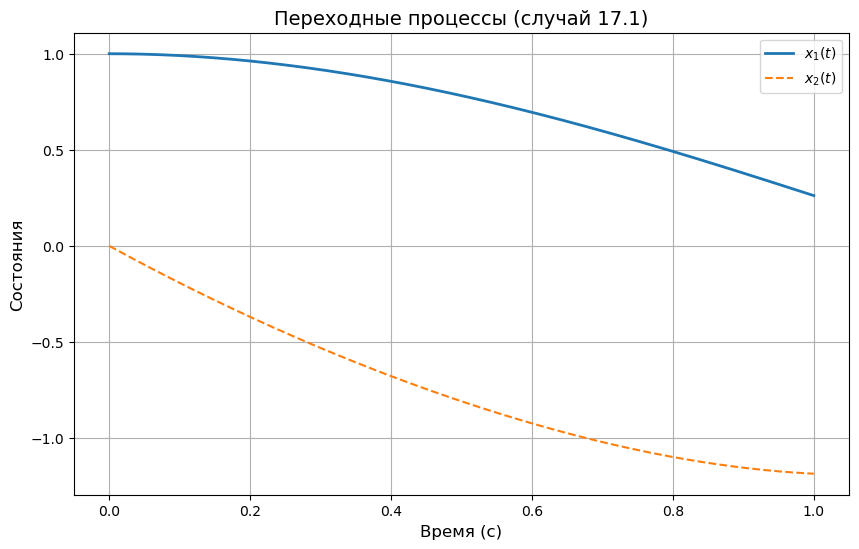

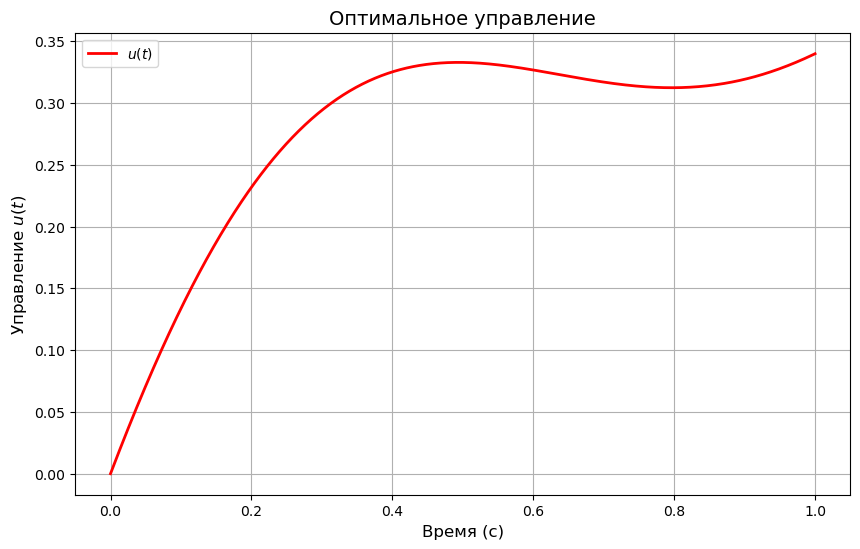

In [49]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])  # Матрица системы
B = np.array([[0], [1]])  # Вектор управления
Q = np.array([[1, 0], [0, 0]])  # Матрица весов состояния
R = 2  # Скаляр для матрицы управления
T = 1  # Время

# ---------------------------
# 2. Проверка управляемости
# ---------------------------
C = np.column_stack([B, A @ B])
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 3. Решение уравнения Риккати (обратное время)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                 [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0, 0], dPdt[0, 1], dPdt[1, 1]]

# Интегрирование от T=1 до t=0
t_span = [T, 0]
sol = solve_ivp(riccati_ode, t_span, [1, 0, 1], t_eval=np.linspace(T, 0, 1000))

# Восстановление P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
              [sol.y[1][-1], sol.y[2][-1]]])
print("P(0):\n", np.round(P0, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Временная сетка для моделирования
t_sim = np.linspace(0, T, 1000)
x0 = np.array([1, 0])  # Начальное условие x(0) = [1, 0]

# Создание регулятора K(t) = R^{-1} B^T P(t)
K = []
for t_idx in range(len(sol.t)):
    P_t = np.array([[sol.y[0][t_idx], sol.y[1][t_idx]],
                   [sol.y[1][t_idx], sol.y[2][t_idx]]])
    K_t = (1/R) * B.T @ P_t
    K.append(K_t.flatten())

# Динамика системы с оптимальным управлением
def system_ode(t, x):
    """Модель замкнутой системы."""
    t_riccati = T - t  # Преобразование времени
    idx = np.argmin(np.abs(sol.t - t_riccati))  # Ищем ближайшее значение времени
    K_t = K[idx]  # Получаем матрицу K для текущего времени
    u = -K_t @ x  # Вычисляем управление (скаляр)
    dxdt = A @ x + B.flatten() * u  # B.flatten() для приведения к размерности (2,)
    return dxdt

# Интегрирование системы
sol_sys = solve_ivp(system_ode, [0, T], x0, t_eval=t_sim)

# ---------------------------
# 5. Графики
# ---------------------------
# График состояний системы
plt.figure(figsize=(10, 6))
plt.plot(sol_sys.t, sol_sys.y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(sol_sys.t, sol_sys.y[1], '--', label=r'$x_2(t)$')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.1)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# График оптимального управления
u_values = []
for t in t_sim:
    t_riccati = T - t  # Преобразование времени
    idx = np.argmin(np.abs(sol.t - t_riccati))  # Ищем ближайшее значение времени
    K_t = K[idx]  # Получаем матрицу K для текущего времени
    u = -K_t @ sol_sys.y[:, np.argmin(np.abs(sol_sys.t - t))]  # Вычисляем управление для текущего времени
    u_values.append(u)

plt.figure(figsize=(10, 6))
plt.plot(t_sim, u_values, label=r'$u(t)$', color='red', linewidth=2)
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Управление $u(t)$', fontsize=12)
plt.title('Оптимальное управление', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


Матрица управляемости:
 [[0. 1.]
 [1. 0.]]
Ранг матрицы: 2 



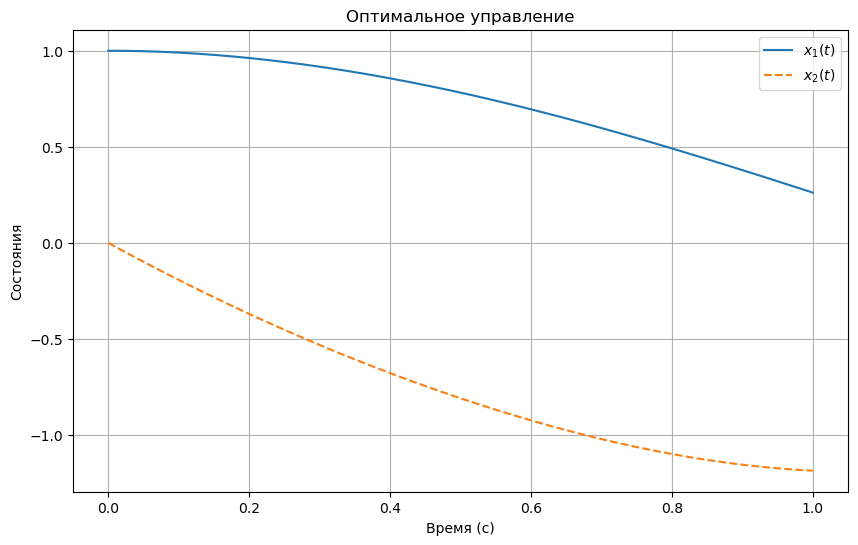

In [45]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = 2
F = np.eye(2)  # Граничное условие P(T) = I
T = 1

# ---------------------------
# 2. Проверка управляемости
# ---------------------------
C = ctrl.ctrb(A, B)
print("Матрица управляемости:\n", C)
print("Ранг матрицы:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 3. Решение уравнения Риккати (обратное время)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                 [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0,0], dPdt[0,1], dPdt[1,1]]

# Интегрирование с использованием устойчивого метода
sol = solve_ivp(riccati_ode, [T, 0], F.flatten()[[0,1,3]], 
                t_eval=np.linspace(T, 0, 1000), method='BDF')

# Подготовка интерполяции для P(t)
time_riccati = sol.t[::-1]  # Обращаем время для интерполяции
p11 = sol.y[0][::-1]
p12 = sol.y[1][::-1]
p22 = sol.y[2][::-1]

interp_p11 = interp1d(time_riccati, p11, fill_value="extrapolate")
interp_p12 = interp1d(time_riccati, p12, fill_value="extrapolate")
interp_p22 = interp1d(time_riccati, p22, fill_value="extrapolate")

# ---------------------------
# 4. Моделирование системы
# ---------------------------
def system_ode(t, x):
    """Модель замкнутой системы с интерполяцией P(t)."""
    t_riccati = T - t
    P_t = np.array([
        [interp_p11(t_riccati), interp_p12(t_riccati)],
        [interp_p12(t_riccati), interp_p22(t_riccati)]
    ])
    K_t = (1/R) * B.T @ P_t
    u = -K_t @ x
    dxdt = A @ x + B.squeeze() * u.squeeze()  # Исправление размерности
    return dxdt

sol_sys = solve_ivp(system_ode, [0, T], [1, 0], t_eval=np.linspace(0, T, 1000))

# ---------------------------
# 5. Визуализация
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(sol_sys.t, sol_sys.y[0], label='$x_1(t)$')
plt.plot(sol_sys.t, sol_sys.y[1], '--', label='$x_2(t)$')
plt.xlabel('Время (с)')
plt.ylabel('Состояния')
plt.title('Оптимальное управление')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])  # Матрица системы
B = np.array([[0], [1]])  # Матрица управления
Q = np.array([[1, 0], [0, 0]])  # Матрица весов для состояний
R = 2  # Матрица весов для управления
T = 1  # Время интегрирования

# ---------------------------
# 2. Проверка управляемости
# ---------------------------
C = ctrl.ctrb(A, B)
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C), "\n")

# ---------------------------
# 3. Решение уравнения Риккати (обратное время)
# ---------------------------
def riccati_ode(t, p_flat):
    """Уравнение Риккати в обратном времени."""
    P = np.array([[p_flat[0], p_flat[1]], 
                 [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0,0], dPdt[0,1], dPdt[1,1]]

# Интегрирование уравнения Риккати от T=1 до t=0
t_span = [T, 0]
sol = solve_ivp(riccati_ode, t_span, [1, 0, 1], t_eval=np.linspace(T, 0, 1000))

# Восстановление матрицы P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
              [sol.y[1][-1], sol.y[2][-1]]])
print("P(0):\n", np.round(P0, 3), "\n")

# ---------------------------
# 4. Моделирование переходных процессов
# ---------------------------
# Временная сетка для моделирования
t_sim = np.linspace(0, T, 1000)
x0 = np.array([1, 0])  # Начальное условие x(0) = [1, 0]

# Создание регулятора K(t) = R^{-1} B^T P(t)
K = []
for t_idx in range(len(sol.t)):
    P_t = np.array([[sol.y[0][t_idx], sol.y[1][t_idx]],
                   [sol.y[1][t_idx], sol.y[2][t_idx]]])
    K_t = (1/R) * B.T @ P_t
    K.append(K_t.flatten())

# График оптимального управления
optimal_control = []
for t_idx in range(len(t_sim)):
    t_riccati = T - t_sim[t_idx]  # Преобразование времени для уравнения Риккати
    idx = np.argmin(np.abs(sol.t - t_riccati))  # Находим индекс ближайшего времени
    K_t = K[idx]  # Берем матрицу K(t)
    u_t = -K_t @ x0  # Оптимальное управление
    optimal_control.append(u_t)

optimal_control = np.array(optimal_control)

# ---------------------------
# 5. Моделирование системы с оптимальным управлением
# ---------------------------
# Модель замкнутой системы с оптимальным управлением
def system_ode(t, x):
    """Модель замкнутой системы с оптимальным управлением."""
    t_riccati = T - t  # Преобразование времени
    idx = np.argmin(np.abs(sol.t - t_riccati))
    K_t = K[idx]  # Получаем матрицу K(t)
    u = -K_t @ x  # Определяем управление
    dxdt = A @ x + B * u  # Динамика системы с учетом управления
    return dxdt

# Интегрирование системы с оптимальным управлением
sol_sys = solve_ivp(system_ode, [0, T], x0, t_eval=t_sim)

# ---------------------------
# 6. Визуализация результатов
# ---------------------------
plt.figure(figsize=(10, 6))

# График состояний системы
plt.subplot(2, 1, 1)
plt.plot(sol_sys.t, sol_sys.y[0], label=r'$x_1(t)$', linewidth=2)
plt.plot(sol_sys.t, sol_sys.y[1], '--', label=r'$x_2(t)$')
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Состояния', fontsize=12)
plt.title('Переходные процессы (случай 17.1)', fontsize=14)
plt.legend()
plt.grid(True)

# График оптимального управления
plt.subplot(2, 1, 2)
plt.plot(t_sim, optimal_control[:, 0], label=r'$u(t)$', color='r', linewidth=2)
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Оптимальное управление $u(t)$', fontsize=12)
plt.title('График оптимального управления', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Матрица управляемости:
 [[0. 1.]
 [1. 0.]]
Ранг матрицы управляемости: 2 

P(0):
 [[2.179 0.25 ]
 [0.25  0.629]] 



ValueError: could not broadcast input array from shape (2,2) into shape (2,)

=== Параметры системы ===
Матрица A:
 [[ 0  1]
 [-2  0]]
Матрица B:
 [[0]
 [1]]
Матрица Q:
 [[1 0]
 [0 0]]
Скаляр R: 2
Конечное время T: 1 

=== Проверка управляемости ===
Матрица управляемости:
 [[0. 1.]
 [1. 0.]]
Ранг матрицы управляемости: 2
Система управляема 

=== Решение Риккати ===
P(0):
 [[2.1791 0.2501]
 [0.2501 0.6285]]
P(T):
 [[1. 0.]
 [0. 1.]] 


=== Ключевые точки ===
Время    x1         x2         u               P11        P12        P22       
0.000  1.0000     0.0000     0.0000          1.0000     0.0000     1.0000    
0.250  0.9414     -0.4524    0.2675          1.3453     -0.1626    0.8442    
0.501  0.7815     -0.8089    0.3328          1.7584     -0.1396    0.6880    
0.751  0.5450     -1.0625    0.3134          2.0721     0.0291     0.6049    
1.000  0.2618     -1.1852    0.3397          2.1791     0.2501     0.6285    


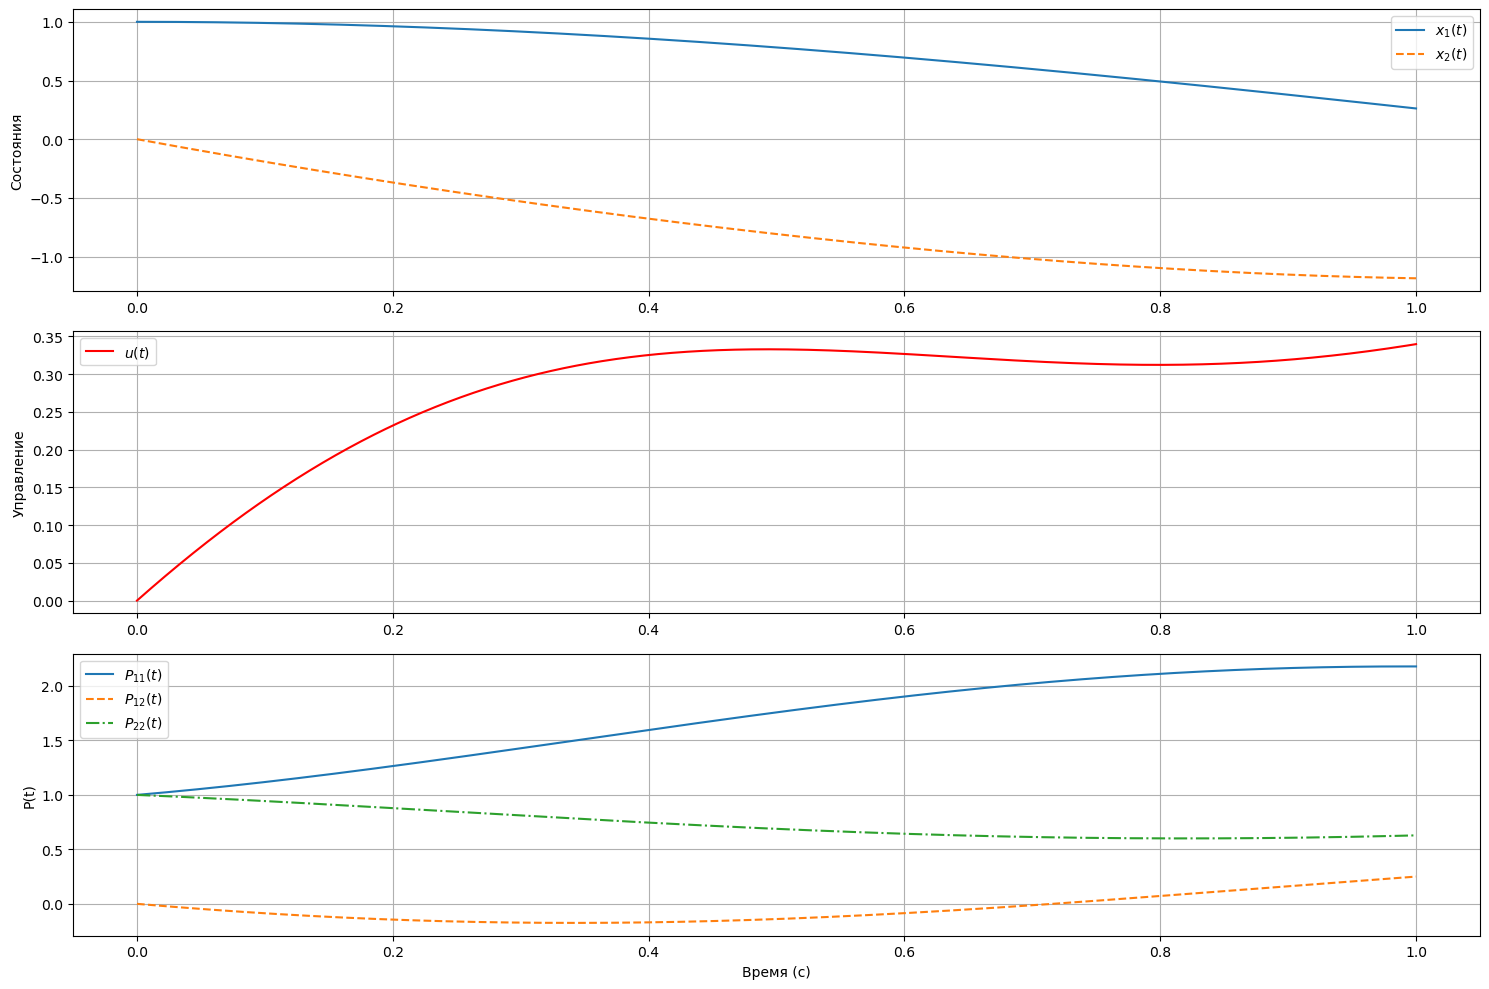

In [59]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import control as ctrl
import matplotlib.pyplot as plt

# ---------------------------
# 1. Параметры системы
# ---------------------------
A = np.array([[0, 1], [-2, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = 2
F = np.eye(2)  # Граничное условие P(T) = I
T = 1

print("=== Параметры системы ===")
print("Матрица A:\n", A)
print("Матрица B:\n", B)
print("Матрица Q:\n", Q)
print("Скаляр R:", R)
print("Конечное время T:", T, "\n")

# ---------------------------
# 2. Проверка управляемости
# ---------------------------
C = ctrl.ctrb(A, B)
print("=== Проверка управляемости ===")
print("Матрица управляемости:\n", C)
print("Ранг матрицы управляемости:", np.linalg.matrix_rank(C))
print("Система", "управляема" if np.linalg.matrix_rank(C) == A.shape[0] else "неуправляема", "\n")

# ---------------------------
# 3. Решение уравнения Риккати (обратное время)
# ---------------------------
def riccati_ode(t, p_flat):
    P = np.array([[p_flat[0], p_flat[1]], 
                 [p_flat[1], p_flat[2]]])
    dPdt = -(A.T @ P + P @ A - (1/R) * (P @ B) @ B.T @ P + Q)
    return [dPdt[0,0], dPdt[0,1], dPdt[1,1]]

sol = solve_ivp(riccati_ode, [T, 0], F.flatten()[[0,1,3]], 
                t_eval=np.linspace(T, 0, 1000), method='BDF')

# Восстановление P(0)
P0 = np.array([[sol.y[0][-1], sol.y[1][-1]], 
              [sol.y[1][-1], sol.y[2][-1]]])
print("=== Решение Риккати ===")
print("P(0):\n", np.round(P0, 4))
print("P(T):\n", F, "\n")  # Должно совпадать с граничным условием

# Подготовка интерполяции
time_riccati = sol.t[::-1]
p11 = sol.y[0][::-1]
p12 = sol.y[1][::-1]
p22 = sol.y[2][::-1]

interp_p11 = interp1d(time_riccati, p11, fill_value="extrapolate")
interp_p12 = interp1d(time_riccati, p12, fill_value="extrapolate")
interp_p22 = interp1d(time_riccati, p22, fill_value="extrapolate")

# ---------------------------
# 4. Моделирование системы
# ---------------------------
def system_ode(t, x):
    t_riccati = T - t
    P_t = np.array([
        [interp_p11(t_riccati), interp_p12(t_riccati)],
        [interp_p12(t_riccati), interp_p22(t_riccati)]
    ])
    K_t = (1/R) * B.T @ P_t
    u = -K_t @ x
    dxdt = A @ x + B.squeeze() * u.squeeze()
    return dxdt

sol_sys = solve_ivp(system_ode, [0, T], [1, 0], t_eval=np.linspace(0, T, 1000))

# Вычисление P(t) и u(t)
time_sim = sol_sys.t
u_values = []
P_values = []

for t in time_sim:
    t_riccati = T - t
    P_t = np.array([
        [interp_p11(t_riccati), interp_p12(t_riccati)],
        [interp_p12(t_riccati), interp_p22(t_riccati)]
    ])
    K_t = (1/R) * B.T @ P_t
    x_t = np.array([sol_sys.y[0][np.where(time_sim == t)[0][0]], 
                   sol_sys.y[1][np.where(time_sim == t)[0][0]]])
    u = (-K_t @ x_t).item()
    
    u_values.append(u)
    P_values.append(P_t)

# Вывод ключевых значений
print("\n=== Ключевые точки ===")
print(f"{'Время':<8} {'x1':<10} {'x2':<10} {'u':<15} {'P11':<10} {'P12':<10} {'P22':<10}")
for i in [0, len(time_sim)//4, len(time_sim)//2, 3*len(time_sim)//4, -1]:
    t = time_sim[i]
    print(f"{t:.3f}  {sol_sys.y[0][i]:<10.4f} {sol_sys.y[1][i]:<10.4f} {u_values[i]:<15.4f} "
          f"{P_values[i][0,0]:<10.4f} {P_values[i][0,1]:<10.4f} {P_values[i][1,1]:<10.4f}")

# ---------------------------
# 5. Визуализация
# ---------------------------
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time_sim, sol_sys.y[0], label='$x_1(t)$')
plt.plot(time_sim, sol_sys.y[1], '--', label='$x_2(t)$')
plt.ylabel('Состояния')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time_sim, u_values, 'r', label='$u(t)$')
plt.ylabel('Управление')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time_sim, [p[0,0] for p in P_values], label='$P_{11}(t)$')
plt.plot(time_sim, [p[0,1] for p in P_values], '--', label='$P_{12}(t)$')
plt.plot(time_sim, [p[1,1] for p in P_values], '-.', label='$P_{22}(t)$')
plt.xlabel('Время (с)')
plt.ylabel('P(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

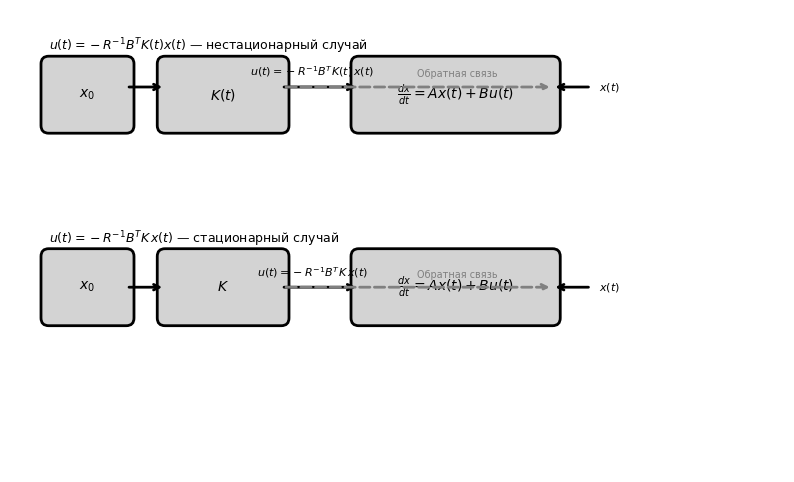

In [121]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_block(ax, xy, width, height, text, fc='lightgray'):
    """
    Функция для рисования блока со скруглёнными углами.
    :param ax: ось matplotlib
    :param xy: (x, y) - координаты левого нижнего угла блока
    :param width: ширина блока
    :param height: высота блока
    :param text: подпись внутри блока
    :param fc: цвет заливки
    """
    box = mpatches.FancyBboxPatch(
        xy, width, height,
        boxstyle="round,pad=0.1", 
        linewidth=2, 
        edgecolor='black', 
        facecolor=fc
    )
    ax.add_patch(box)
    # Позиционируем текст по центру блока
    ax.text(xy[0] + width/2, xy[1] + height/2, text, 
            ha='center', va='center', fontsize=10)

def draw_diagram():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')  # скрыть оси

    # ======= ВЕРХНЯЯ СХЕМА (u(t) = -R^{-1} B^T K(t) x(t)) =======
    # Блок x0
    draw_block(ax, (0.5, 4.5), 1, 0.8, r"$x_0$")
    
    # Блок K(t)
    draw_block(ax, (2.0, 4.5), 1.5, 0.8, r"$K(t)$")
    
    # Блок системы
    draw_block(ax, (4.5, 4.5), 2.5, 0.8, 
               r"$\frac{dx}{dt} = A x(t) + B u(t)$")
    
    # Стрелка x0 -> K(t)
    ax.annotate("", xy=(2.0, 5.0), xytext=(1.5, 5.0),
                arrowprops=dict(arrowstyle="->", lw=2))
    
    # Стрелка K(t) -> System (u(t))
    ax.annotate("", xy=(4.5, 5.0), xytext=(3.5, 5.0),
                arrowprops=dict(arrowstyle="->", lw=2))
    ax.text(3.9, 5.1, r"$u(t) = -R^{-1}B^T K(t)\,x(t)$", fontsize=8, ha='center', va='bottom')
    
    # Стрелка System -> ?
    # Выход x(t)
    ax.annotate("", xy=(7.0, 5.0), xytext=(7.5, 5.0),
                arrowprops=dict(arrowstyle="->", lw=2))
    ax.text(7.6, 5.0, r"$x(t)$", fontsize=8, va='center')
    
    # Обратная связь: x(t) -> K(t)
    ax.annotate("", xy=(3.5, 5.0), xytext=(7.0, 5.0),
                arrowprops=dict(arrowstyle="<-", lw=2, 
                                linestyle='dashed', color='gray'))
    ax.text(5.25, 5.1, "Обратная связь", fontsize=7, va='bottom', color='gray')
    
    # Подпись "Верхняя схема"
    ax.text(0.5, 5.4, 
            r"$u(t) = -R^{-1} B^T K(t) x(t)$ — нестационарный случай", 
            fontsize=9, ha='left', va='bottom')

    # ======= НИЖНЯЯ СХЕМА (u(t) = -R^{-1} B^T K x(t)) =======
    # Блок x0
    draw_block(ax, (0.5, 2.0), 1, 0.8, r"$x_0$")
    
    # Блок K (постоянная матрица)
    draw_block(ax, (2.0, 2.0), 1.5, 0.8, r"$K$")
    
    # Блок системы
    draw_block(ax, (4.5, 2.0), 2.5, 0.8, 
               r"$\frac{dx}{dt} = A x(t) + B u(t)$")
    
    # Стрелка x0 -> K
    ax.annotate("", xy=(2.0, 2.4), xytext=(1.5, 2.4),
                arrowprops=dict(arrowstyle="->", lw=2))
    
    # Стрелка K -> System (u(t))
    ax.annotate("", xy=(4.5, 2.4), xytext=(3.5, 2.4),
                arrowprops=dict(arrowstyle="->", lw=2))
    ax.text(3.9, 2.5, r"$u(t) = -R^{-1}B^T K\,x(t)$", fontsize=8, ha='center', va='bottom')
    
    # Стрелка System -> ?
    # Выход x(t)
    ax.annotate("", xy=(7.0, 2.4), xytext=(7.5, 2.4),
                arrowprops=dict(arrowstyle="->", lw=2))
    ax.text(7.6, 2.4, r"$x(t)$", fontsize=8, va='center')
    
    # Обратная связь: x(t) -> K
    ax.annotate("", xy=(3.5, 2.4), xytext=(7.0, 2.4),
                arrowprops=dict(arrowstyle="<-", lw=2, 
                                linestyle='dashed', color='gray'))
    ax.text(5.25, 2.5, "Обратная связь", fontsize=7, va='bottom', color='gray')
    
    # Подпись "Нижняя схема"
    ax.text(0.5, 2.9, 
            r"$u(t) = -R^{-1} B^T K\, x(t)$ — стационарный случай", 
            fontsize=9, ha='left', va='bottom')

    plt.show()

if __name__ == '__main__':
    draw_diagram()
